In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uproot
from concurrent.futures import ThreadPoolExecutor
import os
import glob
import re
from tqdm import tqdm
import imageio
import open3d as o3d

import matplotlib.animation as animation

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [18]:

files=glob.glob("./build/dump/data_root/*root")

sorted_files = sorted(files, key=lambda x: int(re.search(r'\d+', x).group()))

#sorted_files = sorted(files, key=lambda x: int(re.search(r'\d+', x).group()))

In [19]:
print(sorted_files)
sorted_files=[sorted_files[2],sorted_files[-1]]

sorted_files

['./build/dump/data_root/output0_m10.root', './build/dump/data_root/output_wg0.root', './build/dump/data_root/output0_m100.root', './build/dump/data_root/output_f1.root', './build/dump/data_root/output1_0.root', './build/dump/data_root/output_g_100m_0.root']


['./build/dump/data_root/output0_m100.root',
 './build/dump/data_root/output_g_100m_0.root']

In [20]:
dump=[]
labels=[]


for file in sorted_files:
    labels.append(file)
    workers=8

    decompression_executor = ThreadPoolExecutor(max_workers=workers)
    interpretation_executor = ThreadPoolExecutor(max_workers=workers)


    with uproot.open(file,num_workers=workers,
                     decompression_executor=decompression_executor,
                     interpretation_executor=interpretation_executor) as file:
        print('start_loading')
        tree = file['B4;1']
        braunches=['ID','enr',]
        data=tree.arrays( braunches,library="np")

        # Clean up executors
    decompression_executor.shutdown()
    interpretation_executor.shutdown()

    dump.append(data)


start_loading
start_loading


In [7]:
# plt.figure(figsize=(10,5))
# plt.hist(dump[0], bins=np.linspace(0,2000,100),alpha=0.5,label='with_ground')
# #a=plt.hist(dump[1], bins=np.linspace(400,1000,100),alpha=0.5,label='without_ground')
# plt.grid(True)
# plt.legend()


In [21]:
data_a=[]
for i in braunches:
    data_a.append(dump[0][i])
    
data_c=[]
for i in braunches:
    data_c.append(dump[1][i])

In [22]:
data_b=np.vstack(data_a).T
del data_a


data_x=np.vstack(data_c).T
del data_c

In [24]:
signal_a = np.zeros(10000)  # Pre-allocate result array

np.add.at(signal_a, data_b[:, 0].astype(int) - 1, data_b[:, 1])


signal_x = np.zeros(10000)  # Pre-allocate result array

np.add.at(signal_x, data_x[:, 0].astype(int) - 1, data_x[:, 1])

In [25]:
signal_a=np.array(signal_a).reshape(100,100)
signal_x=np.array(signal_x).reshape(100,100)


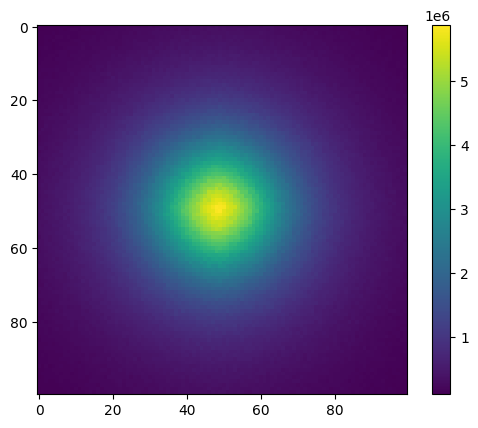

In [26]:
plt.imshow(signal_a)
plt.colorbar()

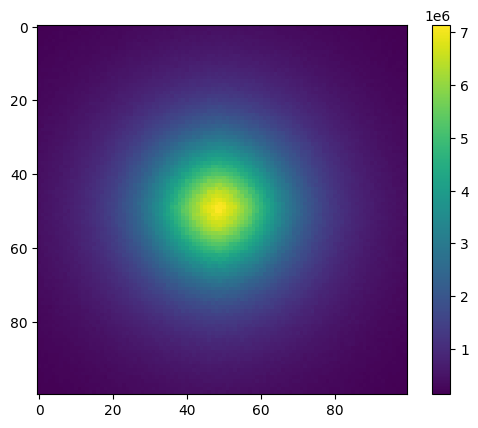

In [27]:
plt.imshow(signal_x)
plt.colorbar()

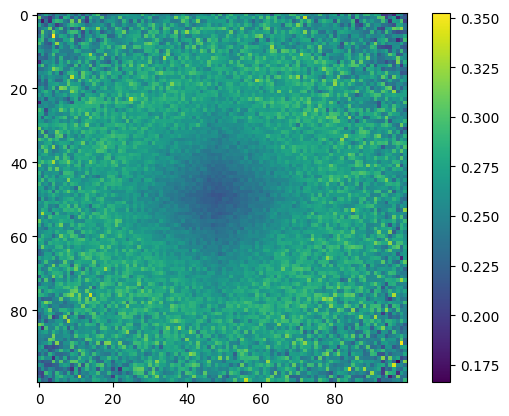

In [34]:
plt.imshow((signal_x-signal_a)/signal_a)
plt.colorbar()

In [33]:
print(signal_x[50,50])
print(signal_a[50,50])

6931981.617548908
5641288.692829768


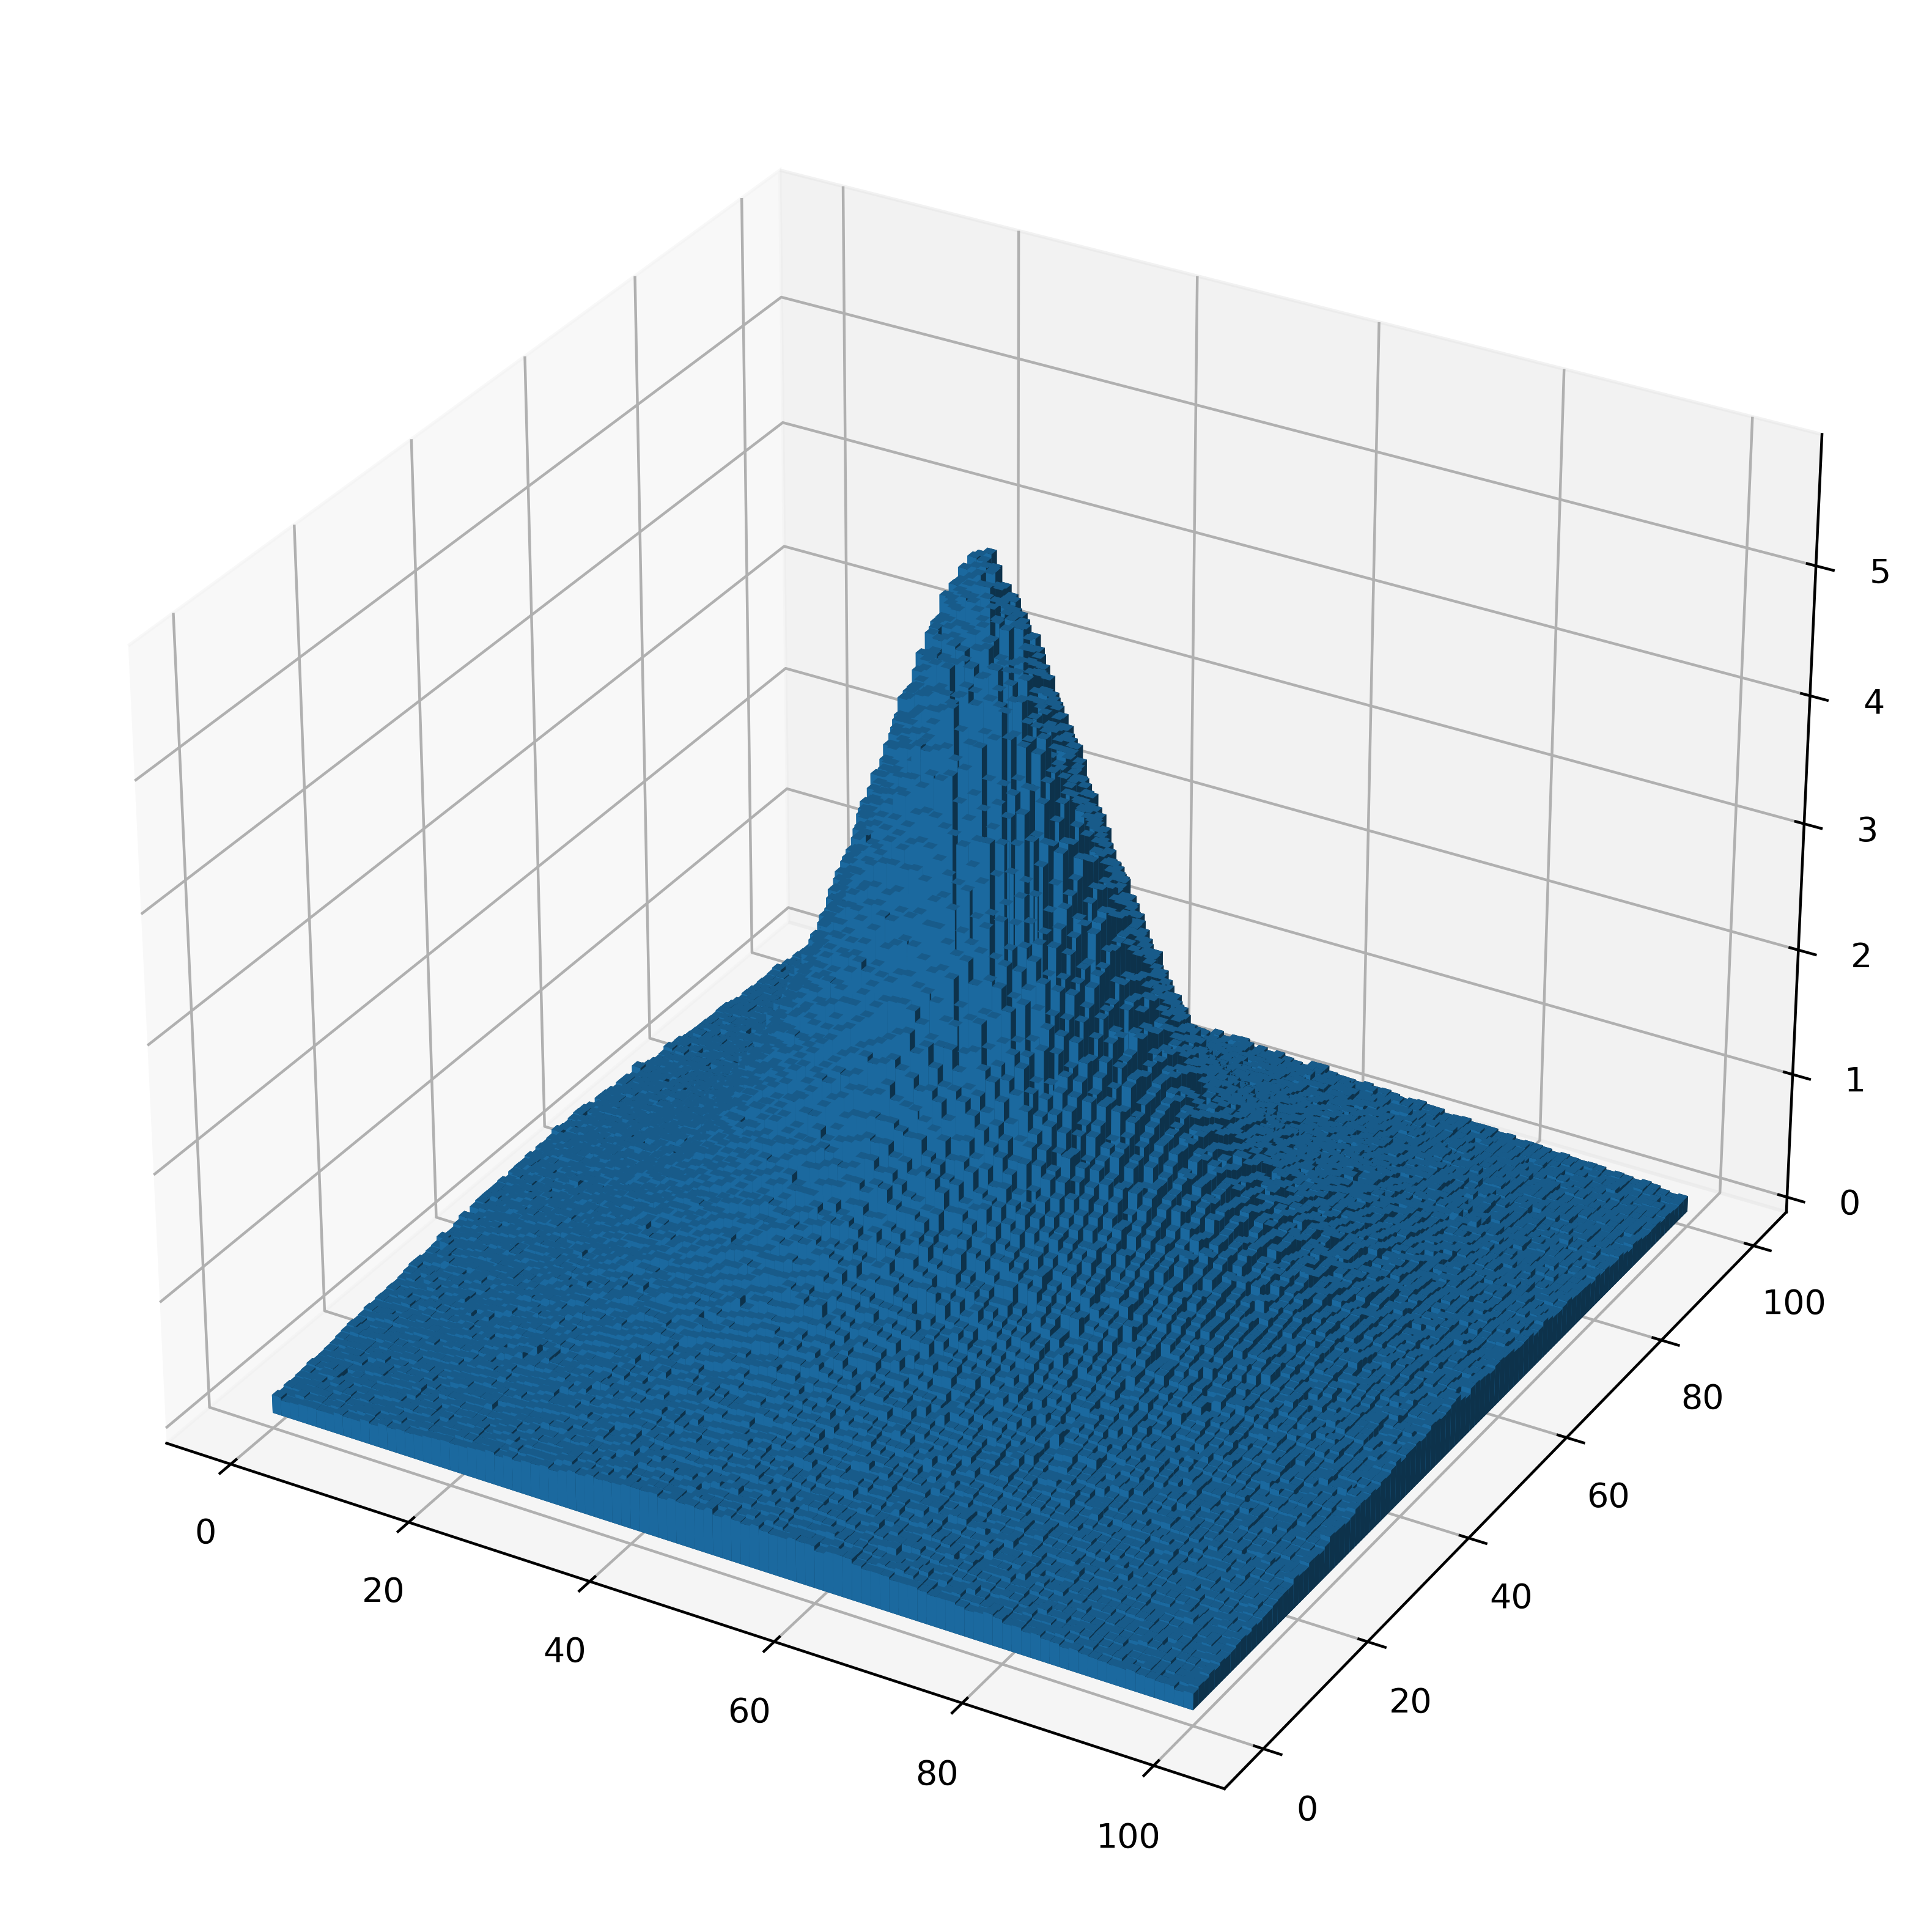

In [14]:
fig = plt.figure(figsize=(10,10),dpi=400)
ax = fig.add_subplot(111, projection='3d')

x_data, y_data = np.meshgrid( np.arange(signal.shape[1]),
                              np.arange(signal.shape[0]) )
                             
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = signal.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data )
plt.savefig('myfield.png')

In [15]:
a=np.unique(data_b[:,0],return_counts=True)

In [16]:
b=a[1]

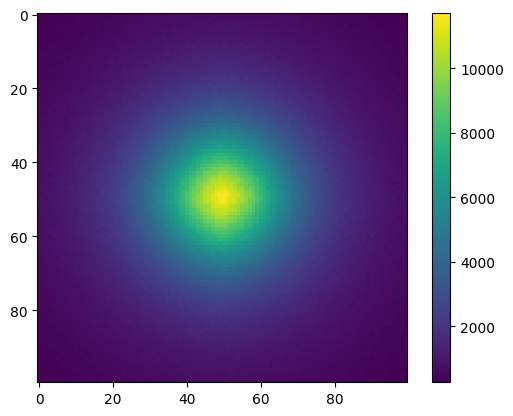

In [17]:
b=b.reshape(100,100)
plt.imshow(b)
plt.colorbar()

Text(0.5, 1.0, 'energy deposeted')

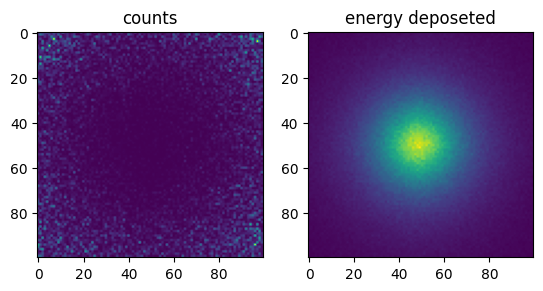

In [48]:
figure, axis = plt.subplots(1, 2)
axis[0].imshow(b)
axis[0].set_title("counts")

axis[1].imshow(signal)

axis[1].set_title("energy deposeted")

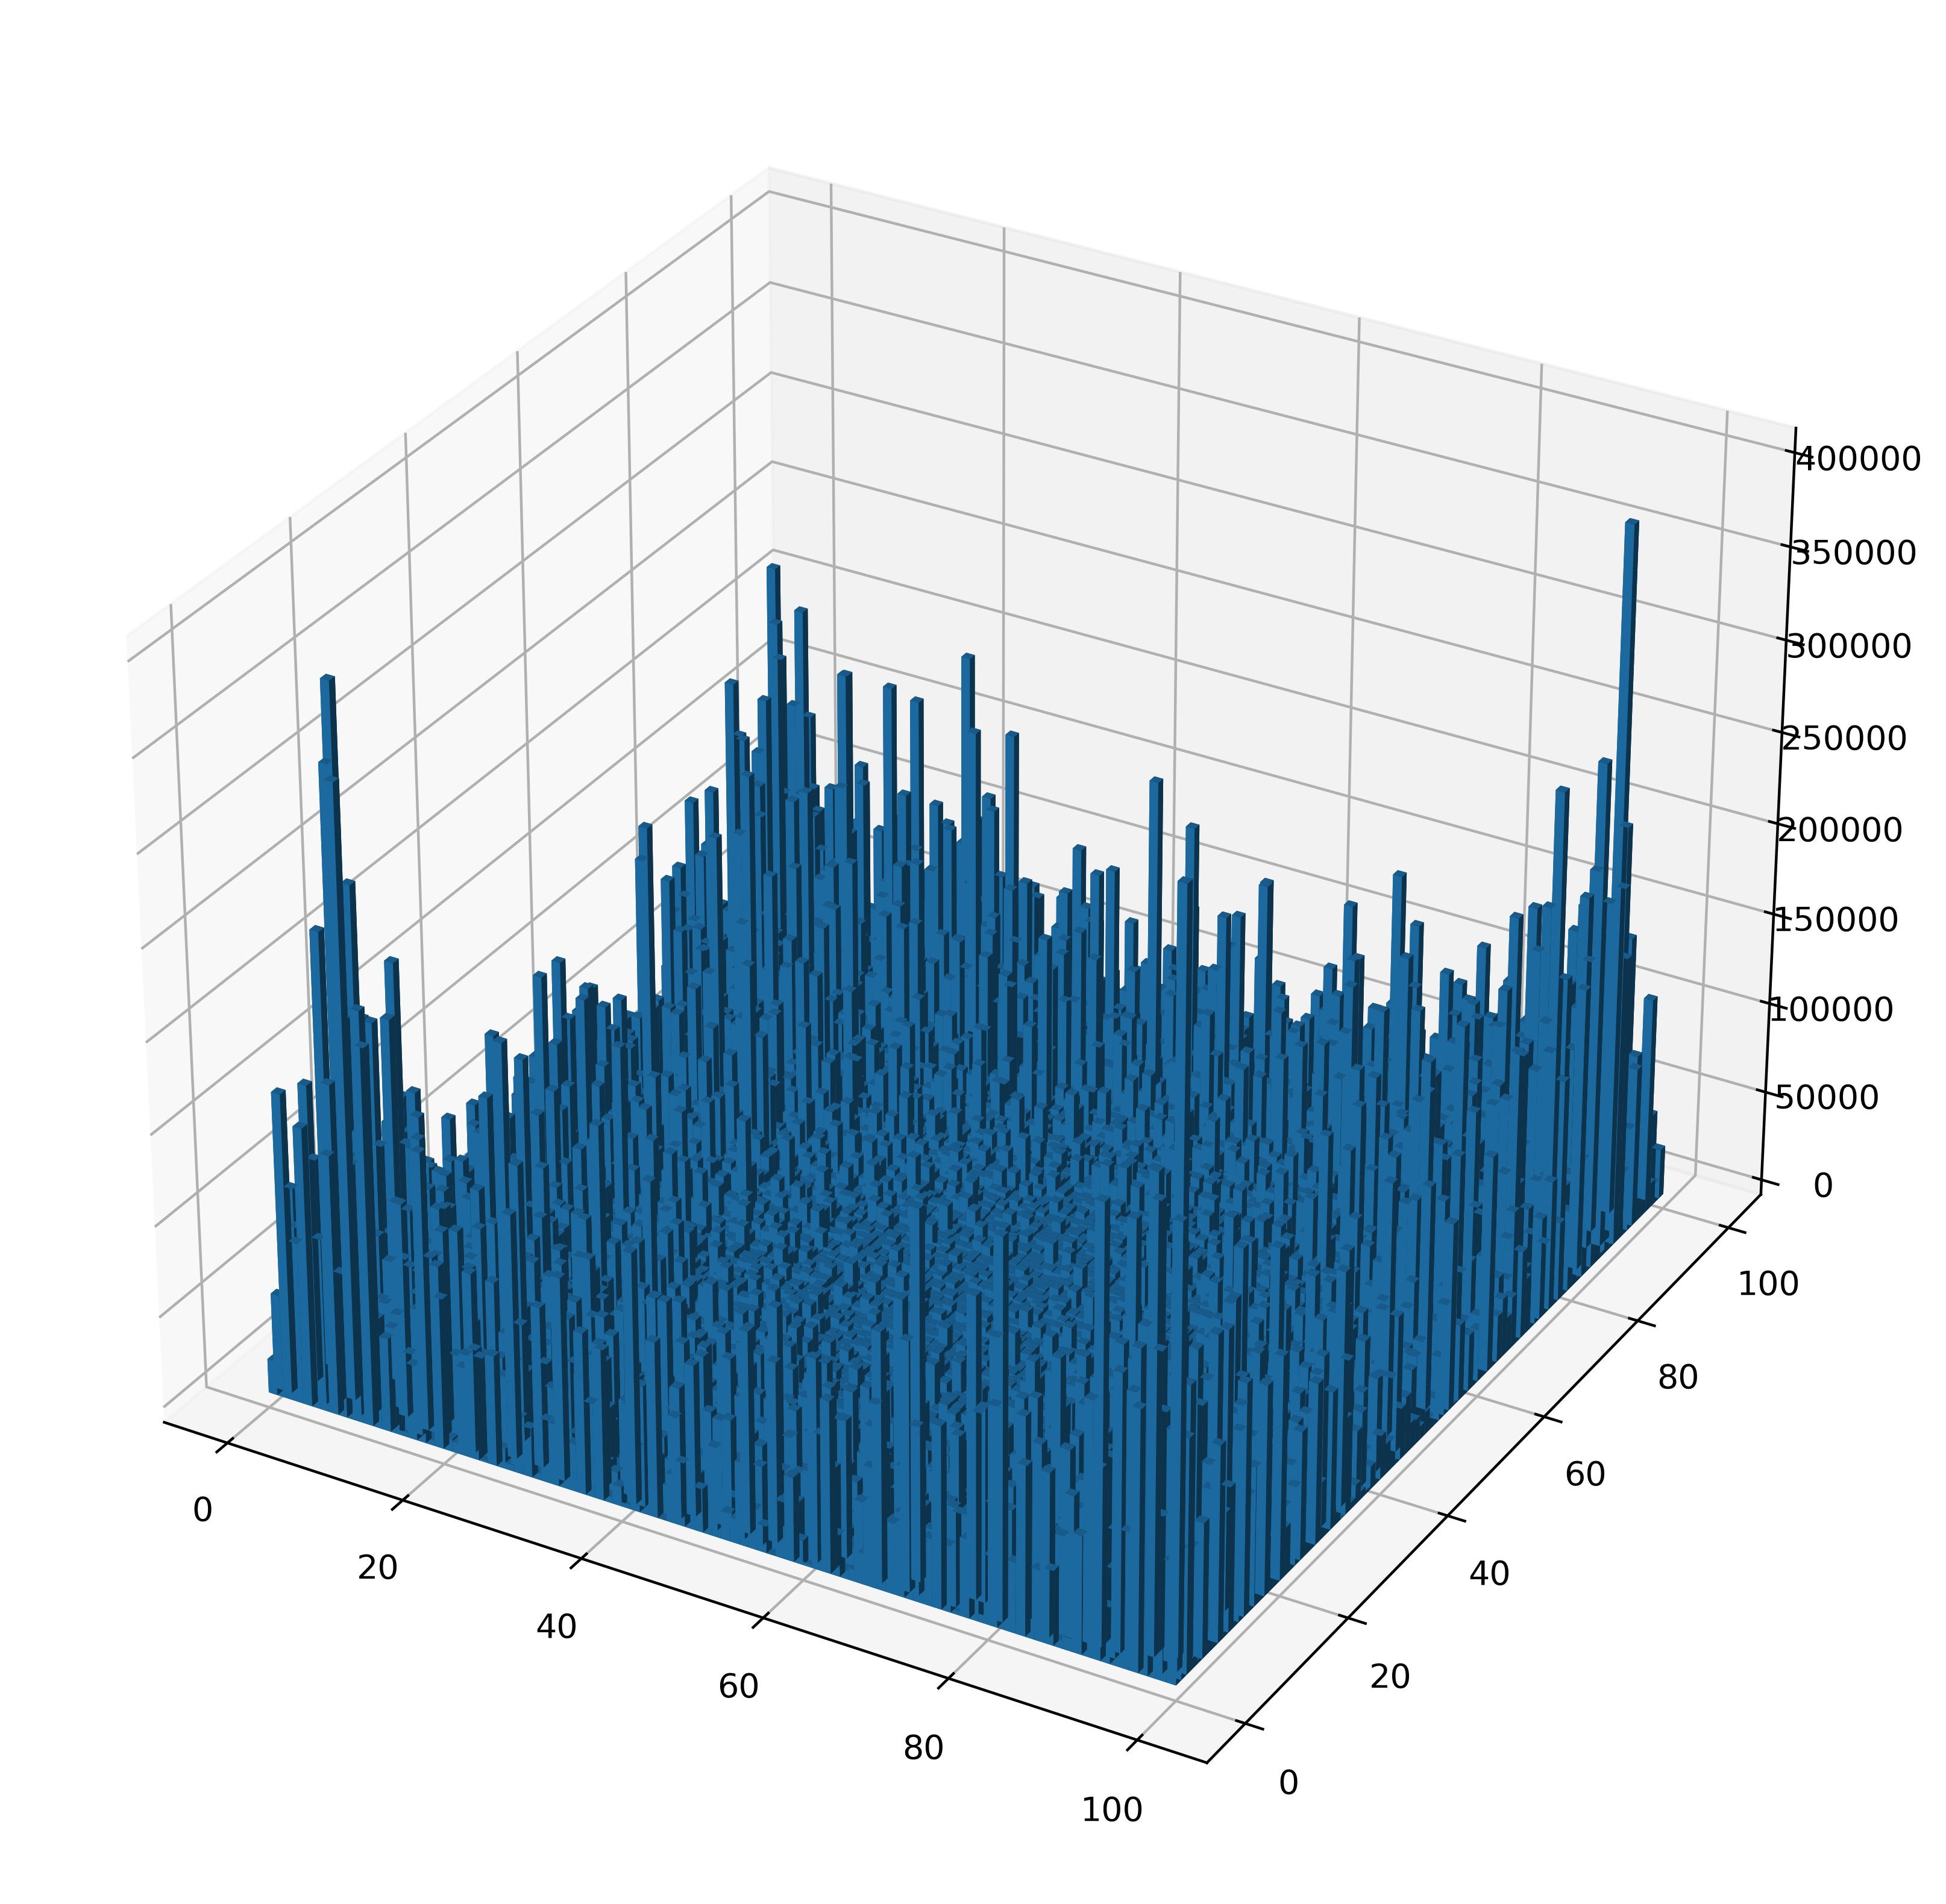

In [49]:
fig = plt.figure(figsize=(10,10),dpi=400)
ax = fig.add_subplot(111, projection='3d')

x_data, y_data = np.meshgrid( np.arange(b.shape[1]),
                              np.arange(b.shape[0]) )
                             
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = b.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data )
plt.savefig('counts.png')

(array([ 0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  0.,  0.]),
 array([  0.        ,  14.28571429,  28.57142857,  42.85714286,
         57.14285714,  71.42857143,  85.71428571, 100.        ,
        114.28571429, 128.57142857, 142.85714286, 157.14285714,
        171.42857143, 185.71428571, 200.        , 214.28571429,
        228.57142857, 242.85714286, 257.14285714, 271.42857143,
        285.71428571, 300.        , 314.28571429, 328.57142857,
        342.85714286, 357.14285714, 371.42857143, 385.71428571,
        400.        , 414.28571429, 428.57142857, 442.85714286,
        457.14285714, 471.42857143, 485.71428571, 500.        ,
        514.28571429, 528.57142857, 542.85714286, 557.14285714,
        571.42857143, 585.71428571, 600.        , 614.28571429,
        628.57142

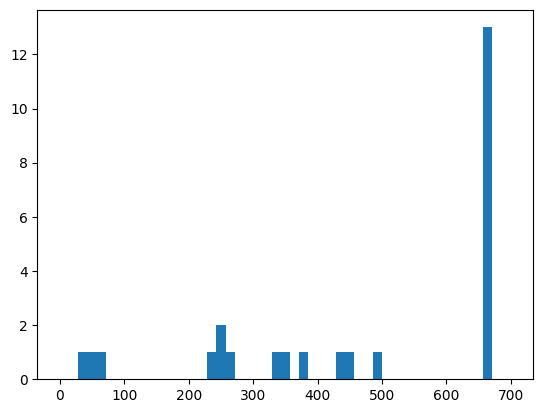

In [54]:
map_5050 = data_b[:,0]==9999

plt.hist(data_b[map_5050,1],bins=np.linspace(0,700,50))

In [55]:
np.count_nonzero(map_5050)

26

In [52]:
a=np.unique(data_b[:,0],return_counts=True)

In [53]:
a

(array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.997e+03, 9.998e+03,
        9.999e+03]),
 array([18657,  7036, 38842, ..., 26550, 45600, 27323]))